In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Webscrapping Wikipedia table to get the IBEX 35 components
page = requests.get("https://en.wikipedia.org/wiki/IBEX_35")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table',id='components',class_="wikitable sortable")

In [3]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Ticker,Company,Sector
0,ACS.MC,ACS,Construction
1,ACX.MC,Acerinox,Steel
2,AENA.MC,Aena,Aviation
3,AMS.MC,Amadeus IT Group,Tourism
4,ANA.MC,Acciona,Construction
5,ANE.MC,Acciona Energía,Energy
6,BBVA.MC,BBVA,Financial Services
7,BKT.MC,Bankinter,Financial Services
8,CABK.MC,CaixaBank,Financial Services
9,CLNX.MC,Cellnex Telecom,Telecommunications


In [4]:
# Get the data for the stock index
index_list = wiki['Ticker'].tolist()
index_list.append('^IBEX')

In [5]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/36 [00:00<?, ?it/s]

In [20]:
# Configuration of different parameters of the notebook
ticker = '^IBEX'
year = '2024'

In [21]:
# Check DataFrame
stock_ticker = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ticker.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-07-12,2826.800049,2826.800049,2814.600098,2826.399902,2826.396973,0
1993-07-13,2826.399902,2843.699951,2820.899902,2843.399902,2843.396973,0
1993-07-14,2845.399902,2858.399902,2845.399902,2851.100098,2851.097168,0
1993-07-15,2848.699951,2848.699951,2835.000000,2843.699951,2843.697021,0
1993-07-16,2843.699951,2848.000000,2818.800049,2830.500000,2830.497070,0
1993-07-19,2825.199951,2825.199951,2817.399902,2822.199951,2822.197021,0
1993-07-20,2829.500000,2840.500000,2829.500000,2840.000000,2839.997070,0
1993-07-21,2832.300049,2832.300049,2819.000000,2830.500000,2830.497070,0
1993-07-22,2830.500000,2849.899902,2814.100098,2838.899902,2838.896973,0


In [22]:
# Check DataFrame tail
stock_ticker.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-11,10280.599609,10330.900391,10268.900391,10325.700195,10325.700195,149087900
2024-03-12,10357.500000,10403.200195,10342.900391,10388.900391,10388.900391,185340700
2024-03-13,10436.299805,10594.099609,10431.799805,10560.500000,10560.500000,169503900
2024-03-14,10567.400391,10606.900391,10476.500000,10490.500000,10490.500000,160547200
2024-03-15,10490.000000,10640.799805,10489.700195,10597.900391,10597.900391,487575600
2024-03-18,10597.099609,10657.000000,10576.599609,10596.700195,10596.700195,145580000
2024-03-19,10604.599609,10711.599609,10589.799805,10701.400391,10701.400391,138362500
2024-03-20,10699.900391,10752.500000,10680.299805,10752.500000,10752.500000,142721700
2024-03-21,10820.799805,10931.700195,10817.900391,10867.500000,10867.500000,186540700


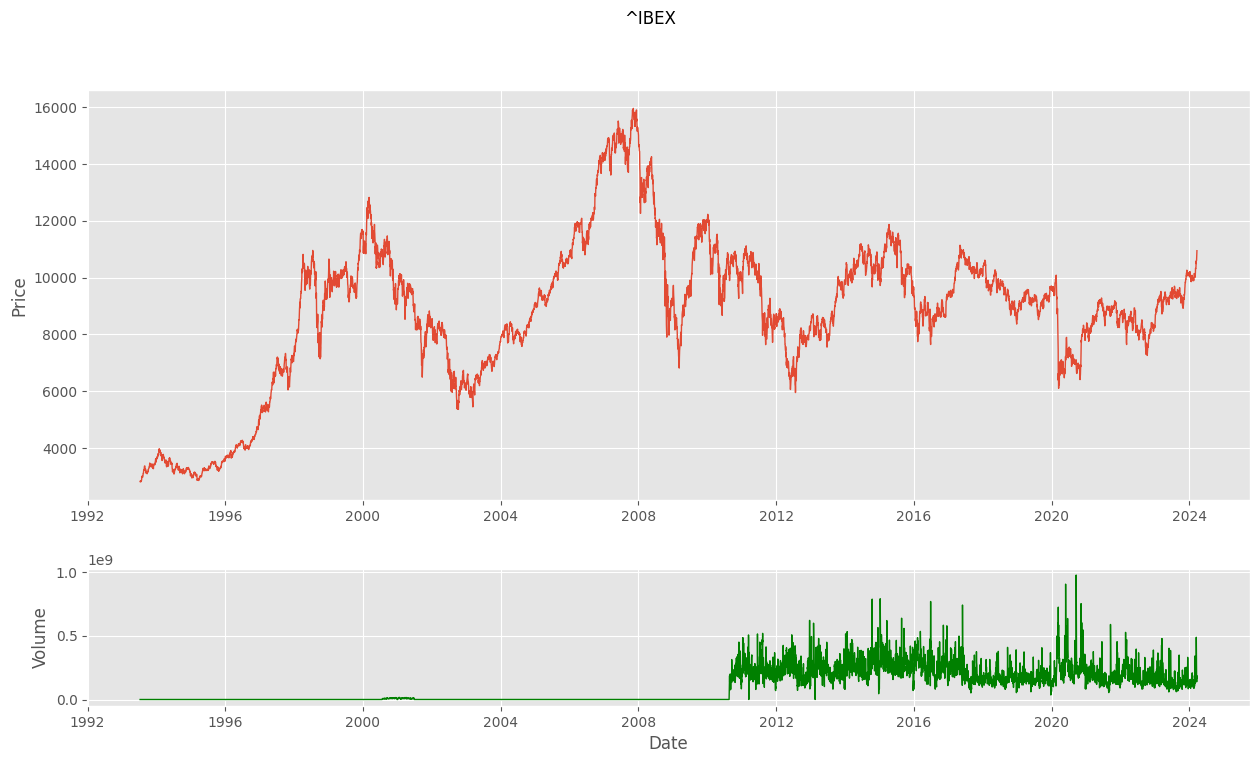

In [23]:
# Plot the adjusted close price
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

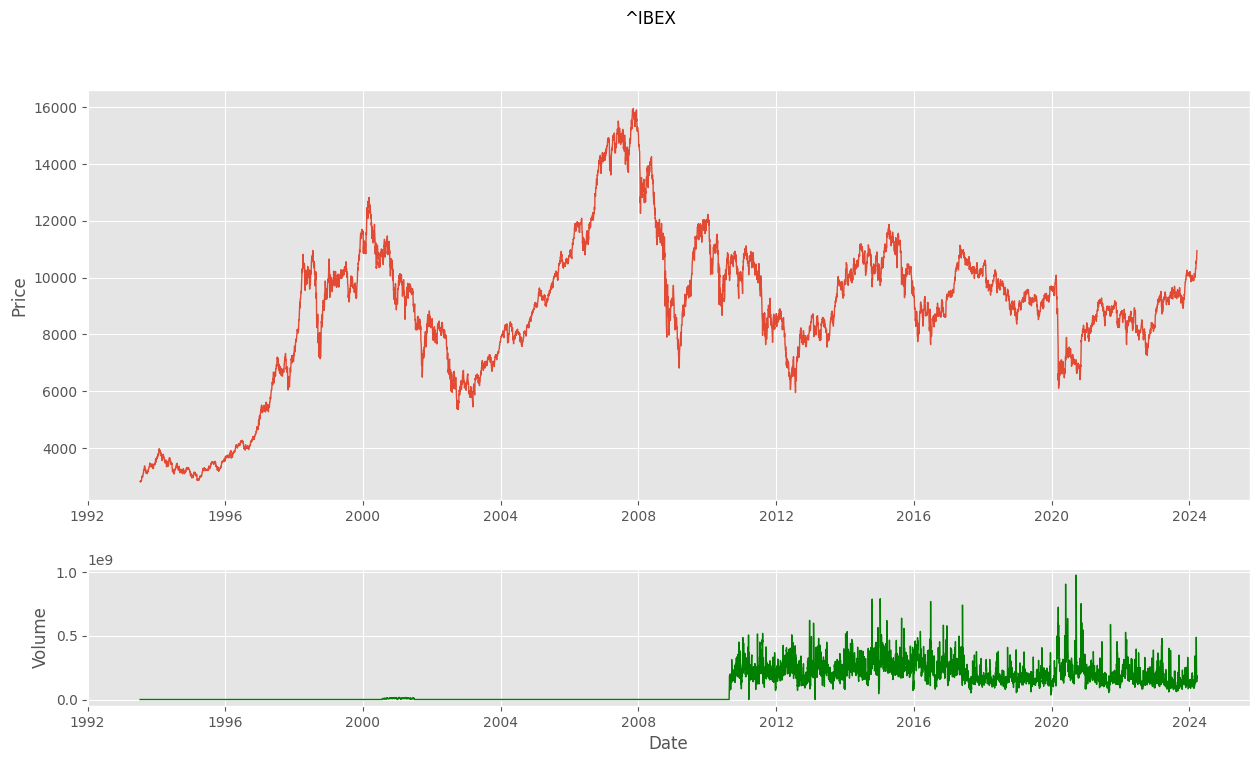

In [24]:
# Plot the close price
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

In [25]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [26]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [27]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ticker['MMA20'] = stock_ticker['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ticker["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ticker['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ticker['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ticker["Adj Close"].loc[year], window=14)

# RSI
stock_ticker['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ticker['Daily_Return'] = daily_return(stock_ticker["Adj Close"].loc[year])

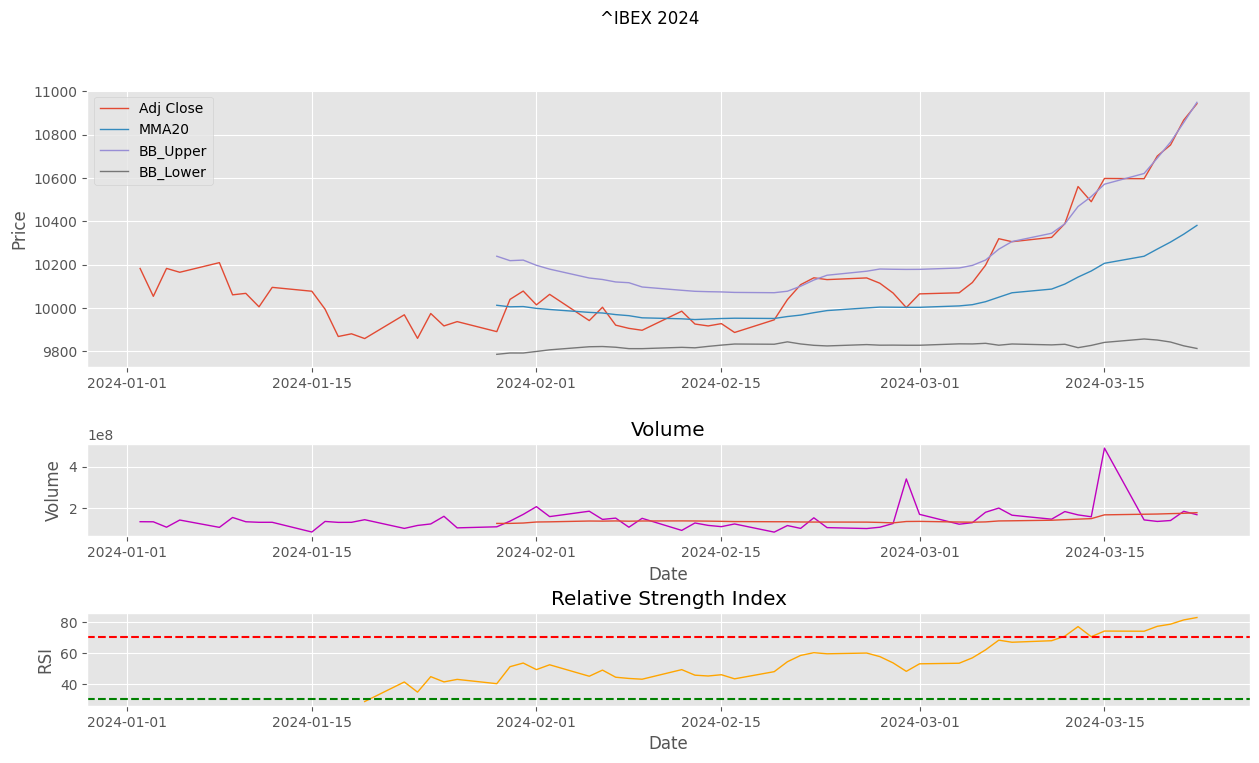

In [28]:
# Plot the adjusted close price
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ticker['MMA20'],linewidth=1) 
axs[0].plot(stock_ticker['BB_Upper'],linewidth=1)
axs[0].plot(stock_ticker['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ticker['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ticker['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ticker['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [29]:
# Plot the adjusted close price
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker['Adj Close'].loc[year].index,y=stock_ticker['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Lower'].loc[year].index,y=stock_ticker['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Upper'].loc[year].index,y=stock_ticker['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['MMA20'].loc[year].index,y=stock_ticker['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker['RSI'].loc[year].index,y=stock_ticker['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [30]:
stock_ticker.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2024-03-11,10280.599609,10330.900391,10268.900391,10325.700195,10325.700195,149087900,10086.864990,10344.661934,9829.068047,67.813714,0.194067
2024-03-12,10357.500000,10403.200195,10342.900391,10388.900391,10388.900391,185340700,10110.039990,10388.144026,9831.935954,70.759101,0.612067
2024-03-13,10436.299805,10594.099609,10431.799805,10560.500000,10560.500000,169503900,10142.235010,10468.263821,9816.206199,76.931718,1.651759
2024-03-14,10567.400391,10606.900391,10476.500000,10490.500000,10490.500000,160547200,10170.395020,10514.111637,9826.678402,70.402886,-0.662847
2024-03-15,10490.000000,10640.799805,10489.700195,10597.900391,10597.900391,487575600,10205.970020,10571.347043,9840.592996,74.042721,1.023787
2024-03-18,10597.099609,10657.000000,10576.599609,10596.700195,10596.700195,145580000,10238.565039,10620.851144,9856.278934,73.933300,-0.011325
2024-03-19,10604.599609,10711.599609,10589.799805,10701.400391,10701.400391,138362500,10271.725049,10691.913601,9851.536497,77.111096,0.988045
2024-03-20,10699.900391,10752.500000,10680.299805,10752.500000,10752.500000,142721700,10303.990039,10765.736210,9842.243868,78.489407,0.477504
2024-03-21,10820.799805,10931.700195,10817.900391,10867.500000,10867.500000,186540700,10340.420020,10856.131886,9824.708153,81.228936,1.069519


  0%|          | 0/36 [00:00<?, ?it/s]

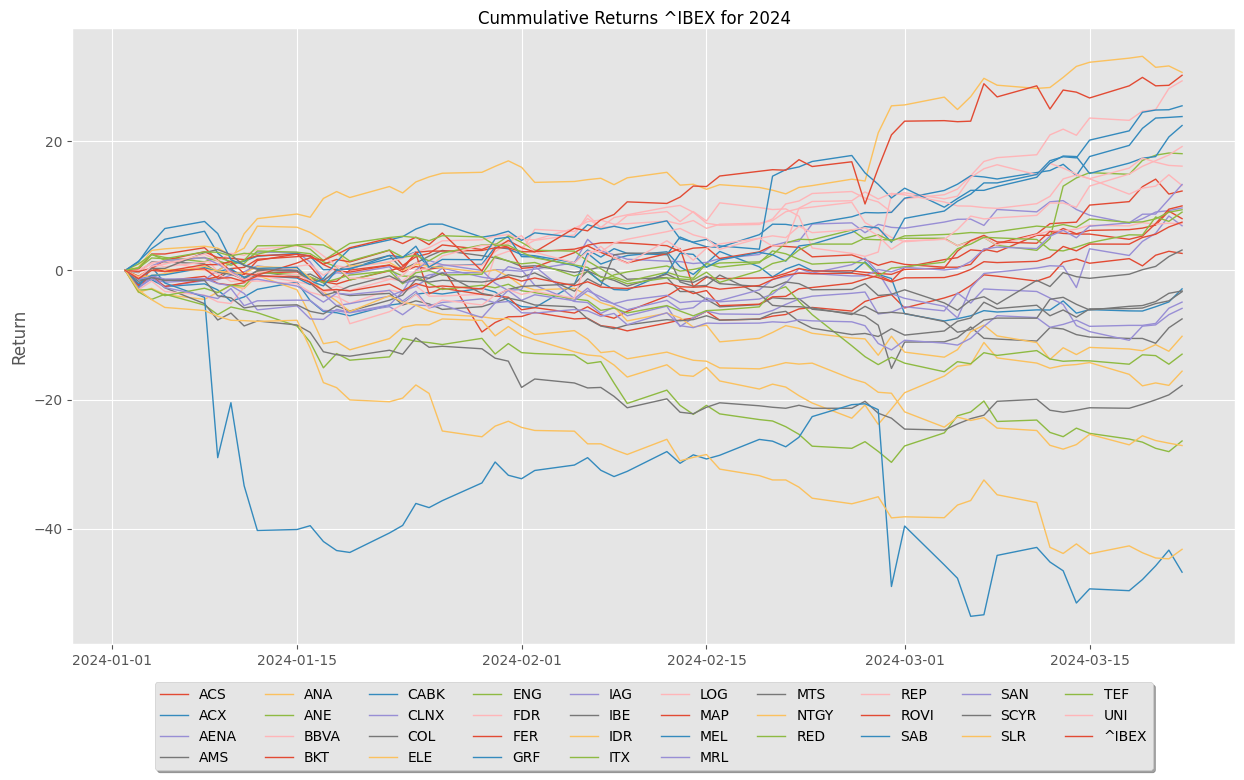

In [31]:
# Plot Cummulative Returns
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns {ticker} for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [32]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/36 [00:00<?, ?it/s]

In [33]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Company']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


  0%|          | 0/36 [00:00<?, ?it/s]

,Ticker,Company,Date,Cummulative_Return
0,IDR.MC,Indra,2024-03-22,30.681816
1,ROVI.MC,Laboratorios Rovi [es],2024-03-22,30.228752
2,BBVA.MC,BBVA,2024-03-22,29.361501
3,SAB.MC,Banco Sabadell,2024-03-22,25.501310
4,CABK.MC,CaixaBank,2024-03-22,23.836904
5,MEL.MC,Meliá Hotels,2024-03-22,22.447255
6,UNI.MC,Unicaja,2024-03-22,19.190819
7,ITX.MC,Inditex,2024-03-22,18.084285
8,REP.MC,Repsol,2024-03-22,16.152249
9,SAN.MC,Santander,2024-03-22,13.312574
